# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning II</font>

# Redes Neurais Recorrentes LSTM - Long Short-Term Memory 

## Prevendo Séries Temporais com LSTMs

In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
import keras as k
k.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
# Imports
import math
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Converte array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Random seed 
numpy.random.seed(7)

# Carrega o dataset
dataframe = pandas.read_csv('data/passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normaliza os dados
# As LSTMs são sensíveis à escala dos dados de entrada, especificamente quando funções de ativação sigmoide (padrão)
# ou tanh são usadas. Pode ser uma boa prática redimensionar os dados para o range de 0 a 1, 
# também chamado de normalização. Podemos normalizar facilmente o conjunto de dados usando a classe MinMaxScaler do scikit-learn
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# A rede LSTM espera que os dados de entrada (X) sejam fornecidos com uma estrutura de matriz específica 
# na forma de: [amostras, etapas de tempo, características]. Nossos dados preparados estão na forma: [amostras,
# features] e estamos enquadrando o problema como um único passo para cada amostra. Podemos transformar
# os dados de treino e de teste na estrutura esperada usando numpy.reshape() 
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Cria o modelo LSTM
# Agora estamos prontos para projetar nossa rede LSTM para esse problema. A rede tem uma
# camada visível com 1 entrada, uma camada oculta com 4 blocos LSTM ou neurônios e uma camada de saída
# que faz uma previsão de valor único. A função de ativação sigmoid padrão é usada para
# os blocos de memória LSTM. A rede é treinada em 200 épocas e um tamanho de lote (batch_size) de 1 é usado.
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 200, batch_size = 1, verbose = 2)

# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Epoch 1/200
 - 0s - loss: 0.0410
Epoch 2/200
 - 0s - loss: 0.0197
Epoch 3/200
 - 0s - loss: 0.0141
Epoch 4/200
 - 0s - loss: 0.0127
Epoch 5/200
 - 0s - loss: 0.0117
Epoch 6/200
 - 0s - loss: 0.0106
Epoch 7/200
 - 0s - loss: 0.0096
Epoch 8/200
 - 0s - loss: 0.0087
Epoch 9/200
 - 0s - loss: 0.0076
Epoch 10/200
 - 0s - loss: 0.0065
Epoch 11/200
 - 0s - loss: 0.0057
Epoch 12/200
 - 0s - loss: 0.0048
Epoch 13/200
 - 0s - loss: 0.0041
Epoch 14/200
 - 0s - loss: 0.0035
Epoch 15/200
 - 0s - loss: 0.0030
Epoch 16/200
 - 0s - loss: 0.0027
Epoch 17/200
 - 0s - loss: 0.0025
Epoch 18/200
 - 0s - loss: 0.0023
Epoch 19/200
 - 0s - loss: 0.0022
Epoch 20/200
 - 0s - loss: 0.0021
Epoch 21/200
 - 0s - loss: 0.0021
Epoch 22/200
 - 0s - loss: 0.0021
Epoch 23/200
 - 0s - loss: 0.0021
Epoch 24/200
 - 0s - loss: 0.0020
Epoch 25/200
 - 0s - loss: 0.0020
Epoch 26/200
 - 0s - loss: 0.0021
Epoch 27/200
 - 0s - loss: 0.0020
Epoch 28/200
 - 0s - loss: 0.0020
Epoch 29/200
 - 0s - loss: 0.0020
Epoch 30/200
 - 0s - lo

<Figure size 640x480 with 1 Axes>

## Prevendo Séries Temporais com LSTMs e Método Window

Podemos também explicar o problema de modo que várias etapas de tempo anteriores possam ser usadas para previsão do próximo passo. Isso é chamado de janela (window) e o tamanho da janela é um parâmetro que pode ser configurado para cada problema.

Epoch 1/200
 - 0s - loss: 0.0575
Epoch 2/200
 - 0s - loss: 0.0103
Epoch 3/200
 - 0s - loss: 0.0067
Epoch 4/200
 - 0s - loss: 0.0059
Epoch 5/200
 - 0s - loss: 0.0054
Epoch 6/200
 - 0s - loss: 0.0049
Epoch 7/200
 - 0s - loss: 0.0044
Epoch 8/200
 - 0s - loss: 0.0041
Epoch 9/200
 - 0s - loss: 0.0037
Epoch 10/200
 - 0s - loss: 0.0036
Epoch 11/200
 - 0s - loss: 0.0033
Epoch 12/200
 - 0s - loss: 0.0032
Epoch 13/200
 - 0s - loss: 0.0030
Epoch 14/200
 - 0s - loss: 0.0029
Epoch 15/200
 - 0s - loss: 0.0028
Epoch 16/200
 - 0s - loss: 0.0027
Epoch 17/200
 - 0s - loss: 0.0026
Epoch 18/200
 - 0s - loss: 0.0025
Epoch 19/200
 - 0s - loss: 0.0024
Epoch 20/200
 - 0s - loss: 0.0023
Epoch 21/200
 - 0s - loss: 0.0021
Epoch 22/200
 - 0s - loss: 0.0022
Epoch 23/200
 - 0s - loss: 0.0020
Epoch 24/200
 - 0s - loss: 0.0019
Epoch 25/200
 - 0s - loss: 0.0018
Epoch 26/200
 - 0s - loss: 0.0017
Epoch 27/200
 - 0s - loss: 0.0017
Epoch 28/200
 - 0s - loss: 0.0017
Epoch 29/200
 - 0s - loss: 0.0016
Epoch 30/200
 - 0s - lo

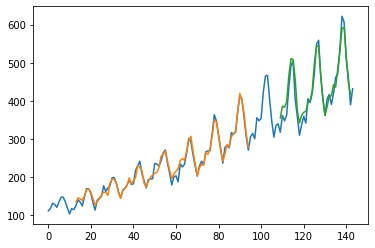

In [4]:
# Imports
import math
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Converte array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Random seed 
numpy.random.seed(7)

# Carrega o dataset
dataframe = pandas.read_csv('data/passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 13
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Cria o modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 200, batch_size = 1, verbose = 2)

# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Prevendo Séries Temporais com LSTMs e Time Steps

Você pode ter notado que a preparação de dados para a rede LSTM inclui etapas de tempo (time steps). Alguns problemas de sequência podem ter uma série variada de etapas de tempo por amostra. Por exemplo, você pode ter medidas de uma máquina industrial levando a um ponto de falha ou a um ponto de aumento de performance. Cada incidente seria uma amostra, as observações que levaram ao evento seriam os passos de tempo e as variáveis observadas seriam os recursos. Passos de tempo fornecem outras forma de tratar nosso problema de séries temporais. Como o exemplo acima usando o método Window, podemos ter passos de tempo anteriores em nossas séries temporais como entradas para prever a saída no próximo passo.

Em vez de reescrever as observações passadas como características de entrada separadas, podemos usá-las como passos de tempo de uma característica (atributo) de entrada, que é realmente um enquadramento mais preciso do problema. Podemos fazer isso usando a mesma representação de dados que no exemplo anterior do método window, exceto quando fazemos o reshape dos dados, onde definimos as colunas como a dimensão time step e alteramos a dimensão das features de volta para 1.

O método window cria novos recursos, como novos atributos para o modelo, enquanto os timesteps são uma sequência dentro de um lote para um determinado recurso.

Epoch 1/200
 - 0s - loss: 0.0103
Epoch 2/200
 - 0s - loss: 0.0056
Epoch 3/200
 - 0s - loss: 0.0049
Epoch 4/200
 - 0s - loss: 0.0045
Epoch 5/200
 - 0s - loss: 0.0041
Epoch 6/200
 - 0s - loss: 0.0040
Epoch 7/200
 - 0s - loss: 0.0039
Epoch 8/200
 - 0s - loss: 0.0037
Epoch 9/200
 - 0s - loss: 0.0039
Epoch 10/200
 - 0s - loss: 0.0038
Epoch 11/200
 - 0s - loss: 0.0039
Epoch 12/200
 - 0s - loss: 0.0037
Epoch 13/200
 - 0s - loss: 0.0036
Epoch 14/200
 - 0s - loss: 0.0037
Epoch 15/200
 - 0s - loss: 0.0037
Epoch 16/200
 - 0s - loss: 0.0036
Epoch 17/200
 - 0s - loss: 0.0036
Epoch 18/200
 - 0s - loss: 0.0037
Epoch 19/200
 - 0s - loss: 0.0037
Epoch 20/200
 - 0s - loss: 0.0036
Epoch 21/200
 - 0s - loss: 0.0034
Epoch 22/200
 - 0s - loss: 0.0036
Epoch 23/200
 - 0s - loss: 0.0034
Epoch 24/200
 - 0s - loss: 0.0034
Epoch 25/200
 - 0s - loss: 0.0035
Epoch 26/200
 - 0s - loss: 0.0035
Epoch 27/200
 - 0s - loss: 0.0034
Epoch 28/200
 - 0s - loss: 0.0033
Epoch 29/200
 - 0s - loss: 0.0033
Epoch 30/200
 - 0s - lo

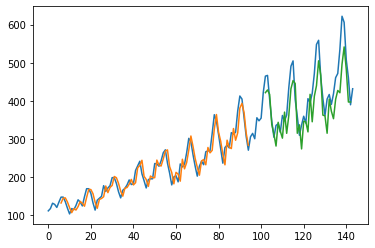

In [5]:
# Imports
import math
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Converte array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Random seed 
numpy.random.seed(7)

# Carrega o dataset
dataframe = pandas.read_csv('data/passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# Time steps
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Cria o modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape = (None, 1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs = 200, batch_size = 1, verbose = 2)

# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Prevendo Séries Temporais com LSTMs e Memória Entre Batches

## LSTMs Stateful x Stateless

Uma LSTM prevê com base na ativação da célula de memória no timestep anterior. Você então deve copiar essa ativação entre lotes? Ou você define todas as ativações como zeros? Isso é o que distingue uma LSTM com estado (stateful) e sem estado (stateless). Portanto, o estado refere-se a ativações de neurônios, não aos parâmetros (que são mantidos em ambos os casos).

Quando devemos usar LSTMs em modo stateful ou stateless?

Depende se você deseja que as previsões no lote n dependam do estado no lote n-1. Por exemplo, na modelagem de linguagem, os lotes sucessivos são trocas sucessivas de texto, por isso faz sentido manter o estado. Mas se você sabe que os lotes sucessivos não estão relacionados entre si, talvez seja mais sensato redefinir o estado.

"Stateless" é como redefinir a LSTM para um "estado inicial" a cada novo lote, e 'stateful' significa que você continua de onde você está. Em ambos os casos, a LSTM está aprendendo porque as probabilidades de transição são atualizadas.

A LSTM stateless deve ser usada se as instâncias de diferentes lotes forem independentes, por exemplo, ao modelar padrões de nível de sentença e cada instância for uma frase - o estado deve ser redefinido para "início de sentença" para cada nova instância. LSTM stateful é mais útil se houver continuidade entre a iª instância de todos os lotes, por exemplo, ao modelar padrões de nível de documento (sem redefinir os limites das orações) ou séries temporais. Neste caso, a i-ésima instância de cada lote deve ser as frases consequentes do i-ésimo documento.

## Memória Entre Batches

A rede LSTM possui memória que é capaz de se lembrar através de sequências longas. Normalmente, o estado dentro da rede é reiniciado após cada lote de treinamento ao chamar modelo.fit(), bem como cada chamada para model.predict() ou model.evaluate(). Nós podemos controlar quando o estado interno da rede LSTM é apagado no Keras, fazendo a camada LSTM com estado (usando o parâmetro stateful). Isso significa que podemos criar estado em toda a sequência de treinamento e até mesmo manter esse estado, se necessário, para fazer previsões.

Esta técnica exige que os dados de treino não sejam "shuffled" durante o treinamento da rede. Também requer reinicialização explícita do estado da rede após cada exposição aos dados de treinamento (epoch) com chamadas para model.reset_states(). Isso significa que devemos criar nosso próprio ciclo externo de épocas e dentro de cada epoch, fazer as chamadas a model.fit() e model.reset().

O módulo reset_states() limpa apenas os estados ocultos da sua rede. Vale a pena mencionar que, dependendo se a opção stateful = True foi configurada em sua rede - o comportamento desta função pode ser diferente. Se não estiver configurado - todos os estados são reiniciados automaticamente após cada cálculo de lote em sua rede (por exemplo, depois de chamar model.fit(), model.predict() e model.evaluate()). Caso contrário - você deve chamar reset_states() toda vez, quando quiser fazer chamadas de modelo consecutivas independentes.

Stateful = True geralmente é usado quando você deseja tratar lotes consecutivos como entradas consecutivas. Neste caso, o modelo está tratando lotes consecutivos como se estivessem no mesmo batch.

Quando a camada LSTM for criada, o parâmetro stateful = True deve ser definido e ao invés de especificar a dimensão de entrada, devemos informar o número de amostras em um batch, o número de time steps na amostra e o número de features no time step configurando o parâmetro batch_input_shape. Nossa camada LSTM ficará assim:

model.add(LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True))

O mesmo batch_size deve ser usado mais tarde para fazer as previsões: model.predict(trainX, batch_size=batch_size)

Configurar uma RNN com stateful = True significa que os estados para as amostras de cada lote serão reutilizados como estados iniciais para as amostras no próximo lote.

Epoch 1/1
 - 0s - loss: 0.0053
Epoch 1/1
 - 0s - loss: 0.0106
Epoch 1/1
 - 0s - loss: 0.0083
Epoch 1/1
 - 0s - loss: 0.0069
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 0s - loss: 0.0054
Epoch 1/1
 - 0s - loss: 0.0051
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/1
 - 0s - loss: 0.0047
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0045
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0044
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0042
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0041
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0037
Epoch 1/1
 - 0s - loss: 0.0046
Epoch 1/1
 - 0s - loss: 0.0048
Epoch 1/

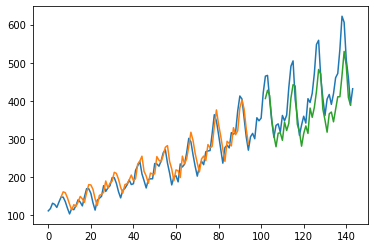

In [6]:
# Imports
import math
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Converte array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Random seed 
numpy.random.seed(7)

# Carrega o dataset
dataframe = pandas.read_csv('data/passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# Time steps
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Cria o modelo LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
for i in range(200):
    model.fit(trainX, trainY, epochs = 1, batch_size = batch_size, verbose = 2, shuffle = False)
    model.reset_states()

# Previsões
trainPredict = model.predict(trainX, batch_size = batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size = batch_size)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Prevendo Séries Temporais com Stacked LSTMs 

Finalmente, vejamos um dos maiores benefícios das LSTMs, o fato de que elas podem ser treinadas com sucesso quando empilhadas em arquiteturas de redes profundas. As redes LSTM podem ser empilhadas em Keras da mesma maneira que outros tipos de camada podem ser empilhadas. Uma adição é que a camada LSTM anterior a cada camada LSTM subsequente, deve retornar a sequência. Isso pode ser feito configurando o parâmetro return_sequences = True na camada 1. 

Epoch 1/1
 - 1s - loss: 0.0057
Epoch 1/1
 - 0s - loss: 0.0231
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0127
Epoch 1/1
 - 0s - loss: 0.0103
Epoch 1/1
 - 0s - loss: 0.0083
Epoch 1/1
 - 0s - loss: 0.0071
Epoch 1/1
 - 0s - loss: 0.0066
Epoch 1/1
 - 0s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0061
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0062
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/

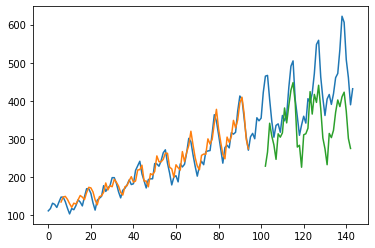

In [7]:
# Imports
import math
import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Converte array em matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# Random seed 
numpy.random.seed(7)

# Carrega o dataset
dataframe = pandas.read_csv('data/passageiros.csv', usecols = [1], engine = 'python', skipfooter = 3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Normaliza os dados
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split em treino e teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Reshape em X=t e Y=t+1
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape do input para: [samples, time steps, features]
# Time steps
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Cria o modelo LSTM
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True, return_sequences = True))
model.add(LSTM(4, batch_input_shape = (batch_size, look_back, 1), stateful = True))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
for i in range(200):
    model.fit(trainX, trainY, epochs = 1, batch_size = batch_size, verbose = 2, shuffle = False)
    model.reset_states()

# Previsões
trainPredict = model.predict(trainX, batch_size = batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size = batch_size)

# Inverte as previsões por conta da normalização
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calcula o RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Score em Treino: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Score em Teste: %.2f RMSE' % (testScore))

# Ajusta as previsões em treino para o plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajusta as previsões em teste para o plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# Plot do baseline e previsões
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Fim